In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
data = pd.read_csv("/content/Walmart DataSet.csv")
data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [3]:
# Checking for null values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# Lets change the data type for date column
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [7]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
# Checking for duplicate value
data.duplicated().any()

False

In [9]:
data['Store'].nunique()

45

In [10]:
data['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [11]:
data.describe()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


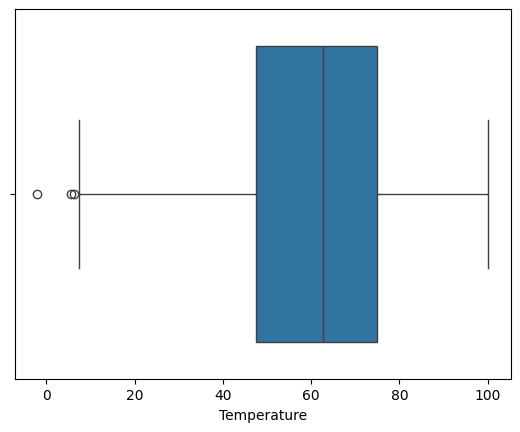

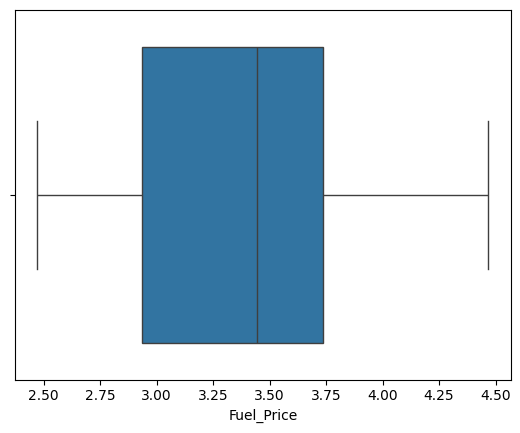

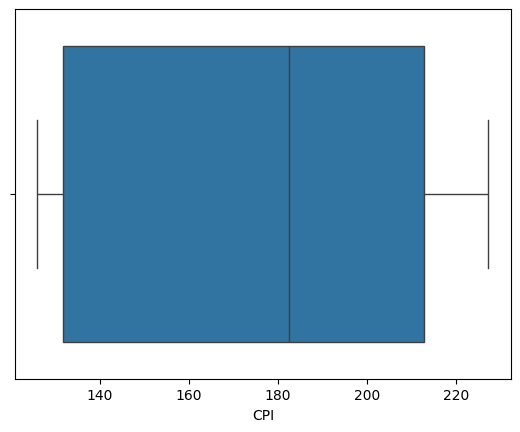

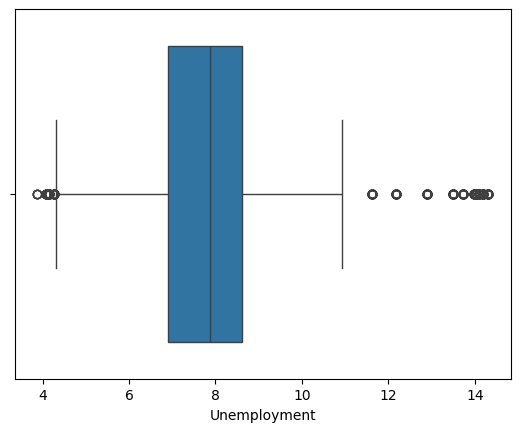

In [12]:
# Cehcking for outliers

num_cols = data[['Temperature','Fuel_Price','CPI','Unemployment']]

for col in num_cols:
    sns.boxplot(data=num_cols,x=col)
    plt.xlabel(col)
    plt.show()

In [13]:
outlier_count = {}

for col in num_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_count[col] = len(outliers)

for col, count in outlier_count.items():
    print(f"Number of outliers in {col}: {count}")

Number of outliers in Temperature: 3
Number of outliers in Fuel_Price: 0
Number of outliers in CPI: 0
Number of outliers in Unemployment: 481


For time series removing outlier may cause data loss. The data points is not that much extreme, So it will not affect our analysis. The FB Prophet model will handle the outlier



### Statistical Analysis





In [14]:
# Lets check the relationship between weekly sales and unemployement rate

data['Weekly_Sales'].describe()

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

In [15]:
data.corr()

<ipython-input-15-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


We can see that the unemployment rate has negative -0.10 values which means if unemployment rate decreases the weekly sales increases.

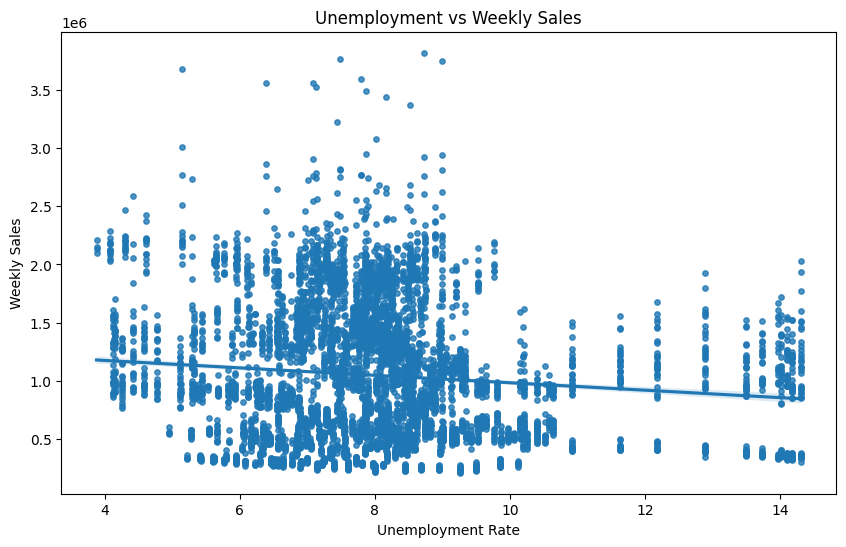

In [16]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Unemployment', y='Weekly_Sales', data=data, scatter_kws={'s': 15})
plt.title('Unemployment vs Weekly Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()

In [17]:
sales_unmp = data.groupby("Store")['Weekly_Sales'].mean().nlargest(5)
sales_unmp

Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
13    2.003620e+06
2     1.925751e+06
Name: Weekly_Sales, dtype: float64

Store Number 20,4,14,13,2 are the top performers in weekly sales

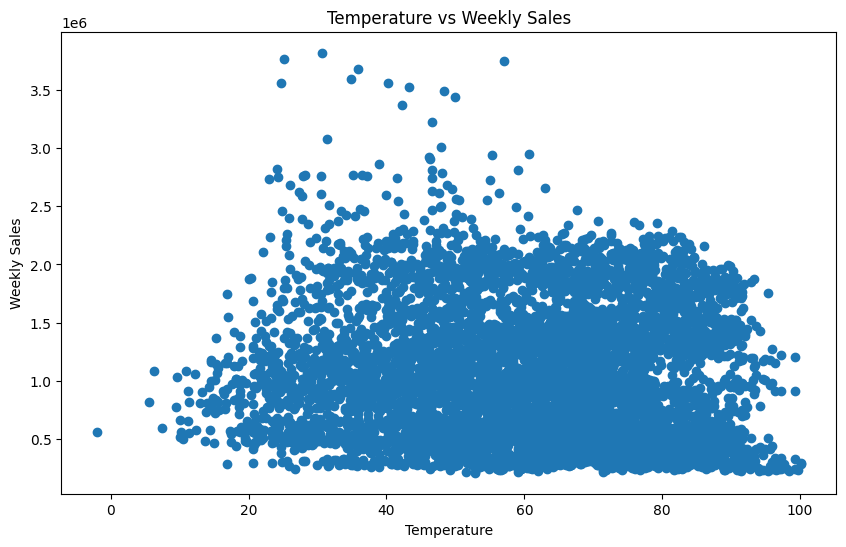

In [18]:
# Temperature vs Weekly sales

plt.figure(figsize=(10, 6))
plt.scatter(x='Temperature', y='Weekly_Sales', data=data)
plt.title('Temperature vs Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

In [19]:
# Lets perform the OLS model to analyse the relationship between temperature and weekly sales

ols_data = data[["Temperature","Weekly_Sales"]]
ols_formula = "Weekly_Sales ~ Temperature"

In [20]:
# Import ols function
from statsmodels.formula.api import ols

In [21]:
# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     26.30
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           3.01e-07
Time:                        05:49:57   Log-Likelihood:                -94339.
No. Observations:                6435   AIC:                         1.887e+05
Df Residuals:                    6433   BIC:                         1.887e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.165e+06   2.41e+04     48.279      0.000    1.12e+06    1.21e+06
Temperature -1952.4192    380.708     -5.128      0.000   -2698.733   -1206.106
==============================================================================
Omnibus:                      401.787   Durbin-Watson:                   0.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              481.264
Skew:                           0.670   Prob(JB):                    3.13e-105
Kurtosis:                       2.974   Cond. No.                         218.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Though our p value is less than 0.05 showing statistical signifincance but our r2 value is only 0.004 that means only 4 % of variance is explained by the model.

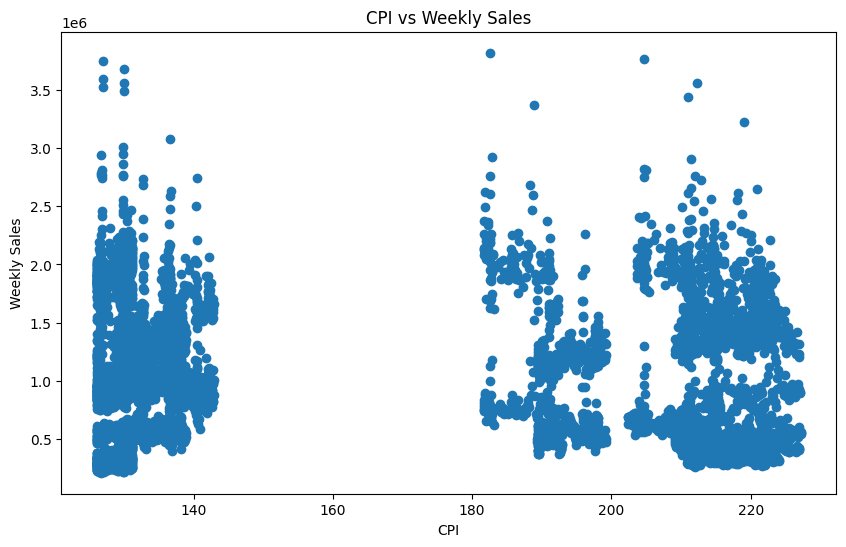

In [23]:
# CPI vs Weekly sales

plt.figure(figsize=(10, 6))
plt.scatter(x='CPI', y='Weekly_Sales', data=data)
plt.title('CPI vs Weekly Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

As per the correlation value of -0.07, we can say that when Consumer price index decreases the sales value increases which makes sense.

In [24]:
# lets check the performance levels of the stores

top_stores = data.groupby('Store')['Weekly_Sales'].mean().nlargest(5)

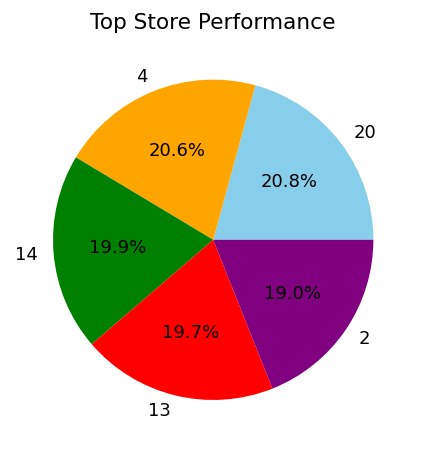

In [25]:
plt.figure(figsize=(4,4),dpi=130)
plt.pie(top_stores,labels=top_stores.index, autopct='%1.1f%%', colors=['skyblue','orange','green','red','purple'])
plt.title('Top Store Performance')
plt.show()

In [26]:
lowest_stores_perf = data.groupby('Store')['Weekly_Sales'].mean().idxmin()
lowest_stores_perf


33

We will do time series analysis for high perfomance stores.¶
Top performing stores as per our analysis are:

Store no: 2,4,13,14,20

## Forecasting Sales for Store No 2

In [27]:
store_2 = data[data['Store']==2][['Date','Weekly_Sales']]
store_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 143 to 285
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          143 non-null    datetime64[ns]
 1   Weekly_Sales  143 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [28]:
store_2.head()

,Date,Weekly_Sales
143,2010-02-05,2136989.46
144,2010-02-12,2137809.50
145,2010-02-19,2124451.54
146,2010-02-26,1865097.27
147,2010-03-05,1991013.13


<Axes: >

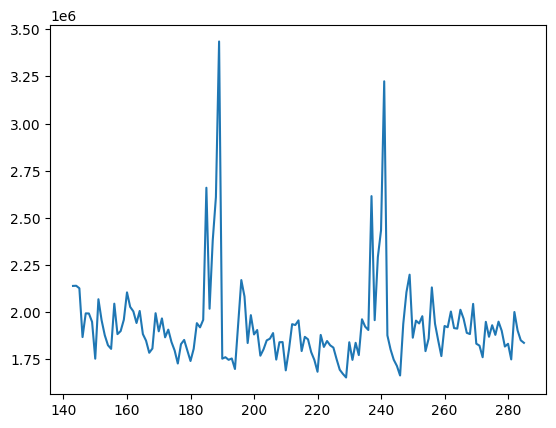

In [29]:
store_2['Weekly_Sales'].plot()

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

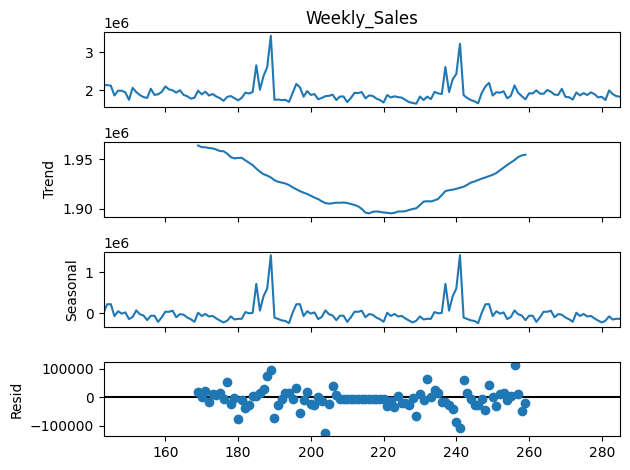

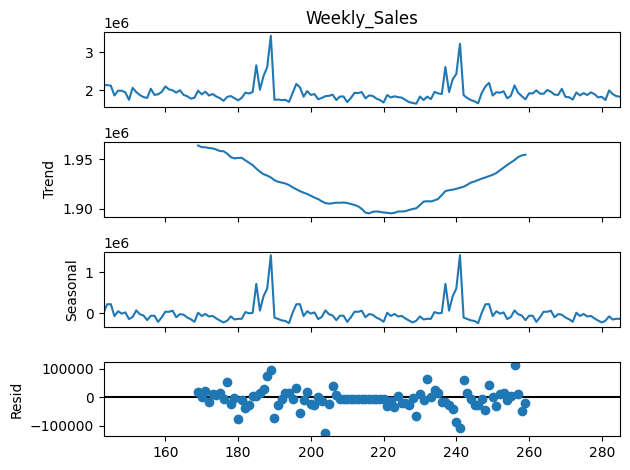

In [31]:
decomposition = seasonal_decompose(store_2["Weekly_Sales"],period=52)
decomposition.plot()

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
result = adfuller(store_2["Weekly_Sales"])
print(result)

(-3.7088625726189153, 0.003990207089066268, 6, 136, {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}, 3512.243755386891)


In [34]:
if (result[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

The data is stationary


## We use FB Prophet model for our time series forecasting

In [35]:
from prophet import Prophet

In [36]:
store_2.head()

,Date,Weekly_Sales
143,2010-02-05,2136989.46
144,2010-02-12,2137809.50
145,2010-02-19,2124451.54
146,2010-02-26,1865097.27
147,2010-03-05,1991013.13


In [37]:
store_2.rename(columns ={'Date':'ds','Weekly_Sales':'y'},inplace=True)

In [38]:
store_2.tail(12)

,ds,y
274,2012-08-10,1866719.96
275,2012-08-17,1928016.01
276,2012-08-24,1876788.15
277,2012-08-31,1947083.30
278,2012-09-07,1898777.07
279,2012-09-14,1814806.63
280,2012-09-21,1829415.67
281,2012-09-28,1746470.56
282,2012-10-05,1998321.04
283,2012-10-12,1900745.13


In [39]:
# Model Building

store_2_model = Prophet()

In [40]:
# Training the model

store_2_model.fit(store_2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptn9f205_/f2m9fsx6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptn9f205_/zv6g75qg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27380', 'data', 'file=/tmp/tmptn9f205_/f2m9fsx6.json', 'init=/tmp/tmptn9f205_/zv6g75qg.json', 'output', 'file=/tmp/tmptn9f205_/prophet_model4i6tf4xd/prophet_model-20240229055000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:50:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:50:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [41]:
store_2_pred = store_2_model.make_future_dataframe(periods=12,freq='W')
store_2_pred.tail(12)

,ds
143,2012-10-28
144,2012-11-04
145,2012-11-11
146,2012-11-18
147,2012-11-25
148,2012-12-02
149,2012-12-09
150,2012-12-16
151,2012-12-23
152,2012-12-30


In [42]:
store_2_forecast = store_2_model.predict(store_2_pred)

In [43]:
store_2_forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(12)

,ds,yhat,yhat_lower,yhat_upper
143,2012-10-28,1.838894e+06,1.649013e+06,2.028538e+06
144,2012-11-04,1.950907e+06,1.767025e+06,2.131387e+06
145,2012-11-11,2.082145e+06,1.904834e+06,2.275845e+06
146,2012-11-18,2.155466e+06,1.965584e+06,2.346991e+06
147,2012-11-25,2.196904e+06,2.010815e+06,2.392178e+06
148,2012-12-02,2.310884e+06,2.120204e+06,2.486583e+06
149,2012-12-09,2.532402e+06,2.328707e+06,2.706406e+06
150,2012-12-16,2.730435e+06,2.537424e+06,2.914685e+06
151,2012-12-23,2.701500e+06,2.505554e+06,2.891216e+06
152,2012-12-30,2.378630e+06,2.191360e+06,2.556551e+06


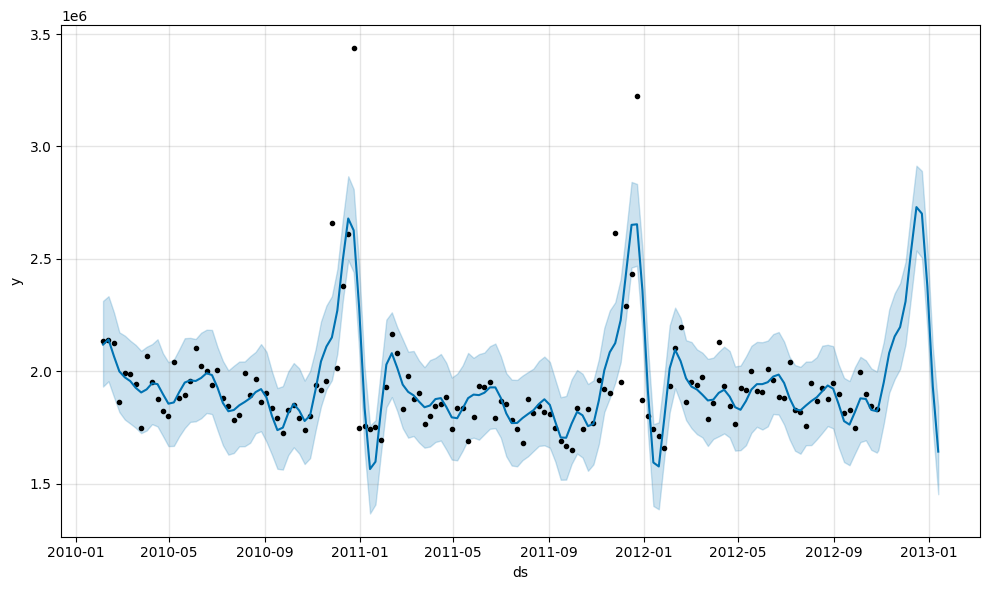

In [44]:
fig1 = store_2_model.plot(store_2_forecast)

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math

In [46]:
actual_sales = store_2['y'].iloc[114:]
predicted_sales = store_2_forecast['yhat'].iloc[114:143]

In [47]:
mse = mean_squared_error(actual_sales,predicted_sales)
mae = mean_absolute_error(actual_sales,predicted_sales)
rmse = math.sqrt(mse)

print(f"Mean Squared error = {mse}")
print(f"Mean Absolute error = {mae}")
print(f"Root mean squared error = {rmse}")

Mean Squared error = 4081745614.9240437
Mean Absolute error = 52018.83753233474
Root mean squared error = 63888.540560291745




*   The MAE value of 52018.83 suggests, on average, the model's predictions are off by approximately $52,018.83.


*   The RMSE value of 63888.54 suggests that, on average, the model's predictions deviate by approximately $63,888.54.


* These results are based on the prediction of last 29 weeks. I have taken last 29 weeks to reduce the magnitude of values.



## Predicting sales for Store No 4

In [48]:
store_4 = data[data['Store']==4][['Date','Weekly_Sales']]
store_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 429 to 571
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          143 non-null    datetime64[ns]
 1   Weekly_Sales  143 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [49]:
store_4.head()

,Date,Weekly_Sales
429,2010-02-05,2135143.87
430,2010-02-12,2188307.39
431,2010-02-19,2049860.26
432,2010-02-26,1925728.84
433,2010-03-05,1971057.44


<Axes: >

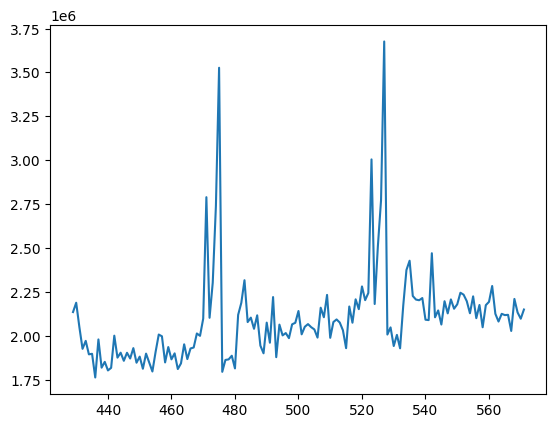

In [50]:
store_4['Weekly_Sales'].plot()

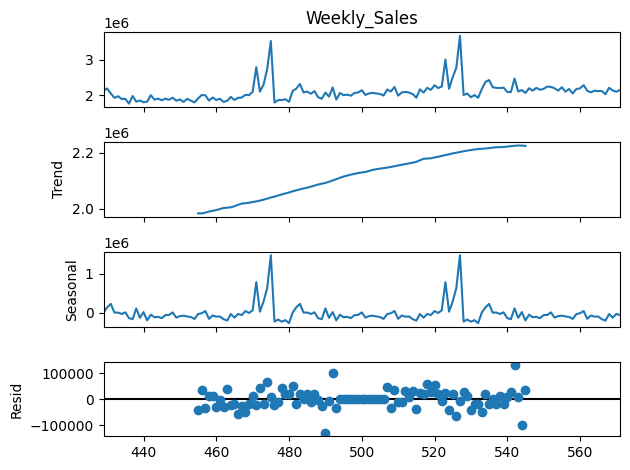

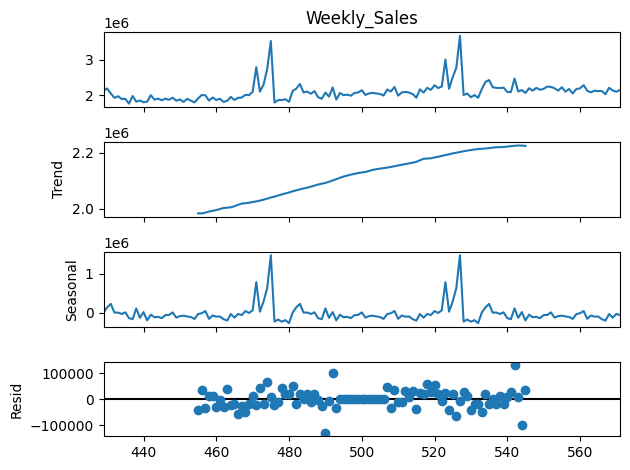

In [51]:
decomposition = seasonal_decompose(store_4["Weekly_Sales"],period=52)
decomposition.plot()

In [52]:
result = adfuller(store_4["Weekly_Sales"])
print(result)

(-2.8793819840147123, 0.04779866223669836, 6, 136, {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}, 3534.637810757122)


In [53]:
if (result[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

The data is stationary


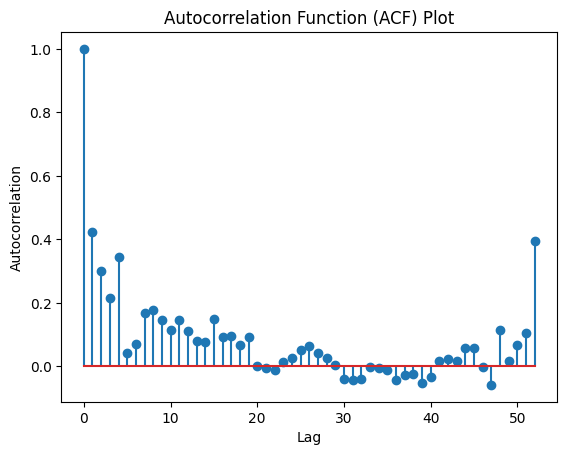

In [54]:
from statsmodels.tsa.stattools import acf

# Compute the ACF
acf_vals = acf(store_4['Weekly_Sales'], fft=True, nlags=52)

# Plot the ACF
plt.stem(acf_vals)
plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [55]:
store_4.rename(columns ={'Date':'ds','Weekly_Sales':'y'},inplace=True)

In [56]:
store_4.tail(12)

,ds,y
560,2012-08-10,2193367.69
561,2012-08-17,2283540.30
562,2012-08-24,2125241.68
563,2012-08-31,2081181.35
564,2012-09-07,2125104.72
565,2012-09-14,2117854.60
566,2012-09-21,2119438.53
567,2012-09-28,2027620.23
568,2012-10-05,2209835.43
569,2012-10-12,2133026.07


In [57]:
# Model Building

store_4_model = Prophet(interval_width=0.99)

In [58]:
# Training the model

store_4_model.fit(store_4)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptn9f205_/lwqsn793.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptn9f205_/tfllnbso.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75124', 'data', 'file=/tmp/tmptn9f205_/lwqsn793.json', 'init=/tmp/tmptn9f205_/tfllnbso.json', 'output', 'file=/tmp/tmptn9f205_/prophet_modelsabus_ch/prophet_model-20240229055004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:50:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:50:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [59]:
store_4_pred = store_4_model.make_future_dataframe(periods=12,freq='W')
store_4_pred.tail(12)

,ds
143,2012-10-28
144,2012-11-04
145,2012-11-11
146,2012-11-18
147,2012-11-25
148,2012-12-02
149,2012-12-09
150,2012-12-16
151,2012-12-23
152,2012-12-30


In [60]:
store_4_forecast = store_4_model.predict(store_4_pred)

In [61]:
store_4_forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(12)

,ds,yhat,yhat_lower,yhat_upper
143,2012-10-28,2.213992e+06,1.836789e+06,2.614323e+06
144,2012-11-04,2.335182e+06,1.941453e+06,2.702039e+06
145,2012-11-11,2.455024e+06,2.068609e+06,2.905815e+06
146,2012-11-18,2.507631e+06,2.133891e+06,2.913475e+06
147,2012-11-25,2.531936e+06,2.065203e+06,2.945909e+06
148,2012-12-02,2.636928e+06,2.219005e+06,3.054093e+06
149,2012-12-09,2.854312e+06,2.435860e+06,3.242466e+06
150,2012-12-16,3.048663e+06,2.618878e+06,3.410610e+06
151,2012-12-23,3.015300e+06,2.583795e+06,3.434537e+06
152,2012-12-30,2.688391e+06,2.244971e+06,3.138645e+06


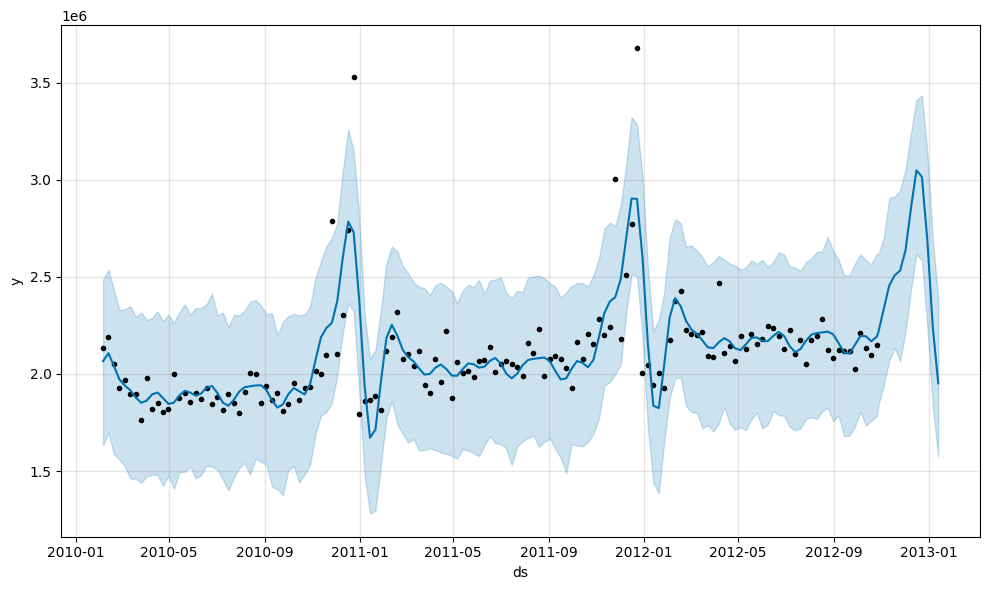

In [62]:
fig2 = store_4_model.plot(store_4_forecast)

In [63]:
actual_sales_1 = store_4['y'].iloc[114:]
predicted_sales_1 = store_4_forecast['yhat'].iloc[114:143]

In [64]:
mse = mean_squared_error(actual_sales_1,predicted_sales_1)
mae = mean_absolute_error(actual_sales_1,predicted_sales_1)
rmse = math.sqrt(mse)

print(f"Mean Squared error = {mse}")
print(f"Mean Absolute error = {mae}")
print(f"Root mean squared error = {rmse}")

Mean Squared error = 3864843325.7734647
Mean Absolute error = 51582.645169022406
Root mean squared error = 62167.86409209717


## Predicting Sales for Store No 13

In [65]:
store_13 = data[data['Store']==13][['Date','Weekly_Sales']]
store_13.head()

,Date,Weekly_Sales
1716,2010-02-05,1967220.53
1717,2010-02-12,2030933.46
1718,2010-02-19,1970274.64
1719,2010-02-26,1817850.32
1720,2010-03-05,1939980.43


In [66]:
store_13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 1716 to 1858
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          143 non-null    datetime64[ns]
 1   Weekly_Sales  143 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


<Axes: >

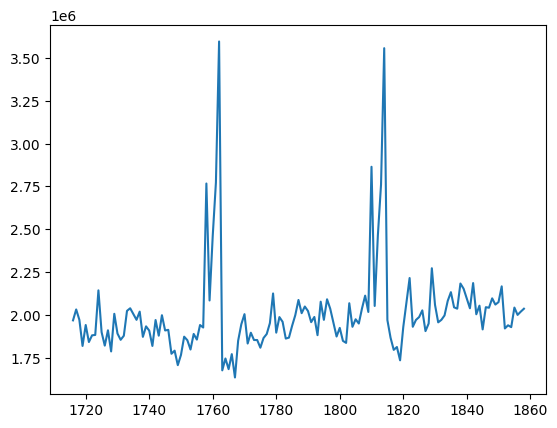

In [67]:
store_13['Weekly_Sales'].plot()

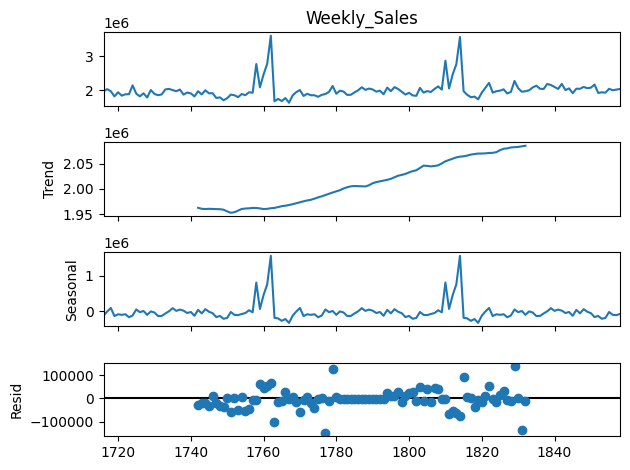

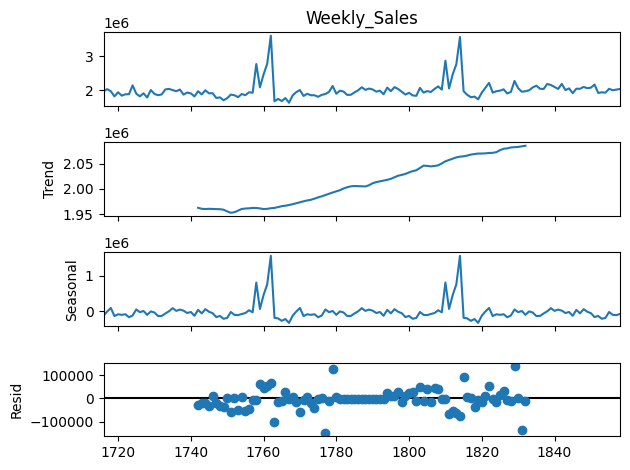

In [68]:
decomposition = seasonal_decompose(store_13["Weekly_Sales"],period=52)
decomposition.plot()

In [69]:
result = adfuller(store_13["Weekly_Sales"])
print(result)

(-5.502481711233357, 2.05644619369346e-06, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 3536.9858797287834)


In [70]:
if (result[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

The data is stationary


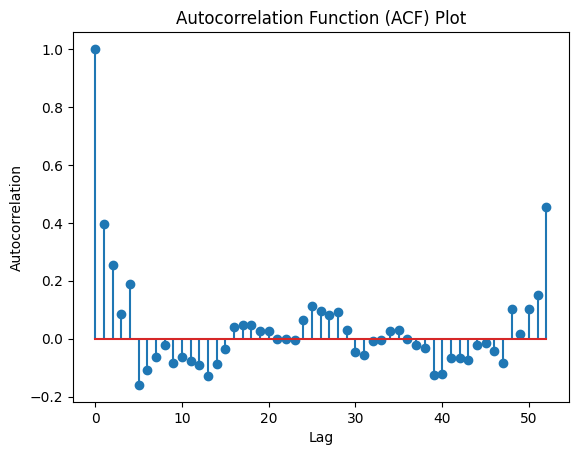

In [71]:
# Compute the ACF
acf_vals = acf(store_13['Weekly_Sales'], fft=True, nlags=52)

# Plot the ACF
plt.stem(acf_vals)
plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [72]:
store_13.rename(columns ={'Date':'ds','Weekly_Sales':'y'},inplace=True)
store_13.head()

,ds,y
1716,2010-02-05,1967220.53
1717,2010-02-12,2030933.46
1718,2010-02-19,1970274.64
1719,2010-02-26,1817850.32
1720,2010-03-05,1939980.43


In [73]:
# Model Building

store_13_model = Prophet(interval_width=0.99)

In [74]:
# Training the model

store_13_model.fit(store_13)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptn9f205_/ybtlji96.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptn9f205_/8w1sx65k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12662', 'data', 'file=/tmp/tmptn9f205_/ybtlji96.json', 'init=/tmp/tmptn9f205_/8w1sx65k.json', 'output', 'file=/tmp/tmptn9f205_/prophet_modelei19xawo/prophet_model-20240229055011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:50:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:50:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [75]:
store_13_pred = store_13_model.make_future_dataframe(periods=12,freq='W')
store_13_pred.tail(12)

,ds
143,2012-10-28
144,2012-11-04
145,2012-11-11
146,2012-11-18
147,2012-11-25
148,2012-12-02
149,2012-12-09
150,2012-12-16
151,2012-12-23
152,2012-12-30


In [76]:
store_13_forecast = store_13_model.predict(store_13_pred)

In [77]:
store_13_forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(12)

,ds,yhat,yhat_lower,yhat_upper
143,2012-10-28,1.998957e+06,1.580718e+06,2.408086e+06
144,2012-11-04,2.106611e+06,1.693469e+06,2.481246e+06
145,2012-11-11,2.218823e+06,1.805739e+06,2.616643e+06
146,2012-11-18,2.276264e+06,1.885042e+06,2.727274e+06
147,2012-11-25,2.335722e+06,1.882629e+06,2.740339e+06
148,2012-12-02,2.507160e+06,2.114512e+06,2.894698e+06
149,2012-12-09,2.787629e+06,2.395653e+06,3.193711e+06
150,2012-12-16,2.995156e+06,2.581951e+06,3.371372e+06
151,2012-12-23,2.912812e+06,2.523355e+06,3.263166e+06
152,2012-12-30,2.511802e+06,2.087482e+06,2.958843e+06


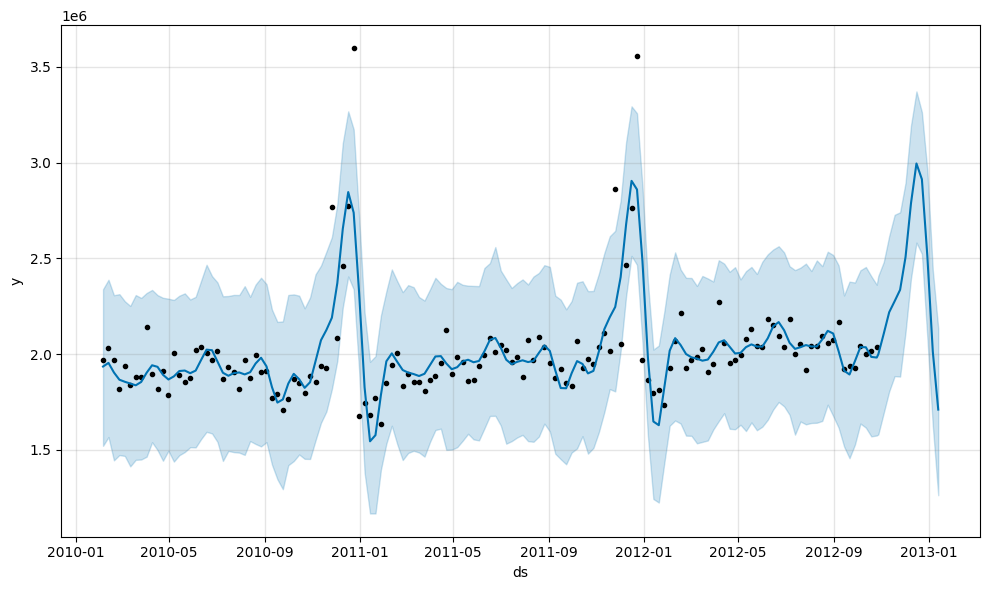

In [78]:
fig3 = store_13_model.plot(store_13_forecast)

In [79]:
actual_sales_2 = store_13['y'].iloc[114:]
predicted_sales_2 = store_13_forecast['yhat'].iloc[114:143]

In [80]:
mse = mean_squared_error(actual_sales_2,predicted_sales_2)
mae = mean_absolute_error(actual_sales_2,predicted_sales_2)
rmse = math.sqrt(mse)

print(f"Mean Squared error = {mse}")
print(f"Mean Absolute error = {mae}")
print(f"Root mean squared error = {rmse}")

Mean Squared error = 3814542513.040088
Mean Absolute error = 45718.00585520825
Root mean squared error = 61761.982748613955


## Predicting Sales for Store no 14

In [81]:
store_14 = data[data['Store']==14][['Date','Weekly_Sales']]
store_14.head()

,Date,Weekly_Sales
1859,2010-02-05,2623469.95
1860,2010-02-12,1704218.84
1861,2010-02-19,2204556.70
1862,2010-02-26,2095591.63
1863,2010-03-05,2237544.75


In [82]:
store_14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 1859 to 2001
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          143 non-null    datetime64[ns]
 1   Weekly_Sales  143 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


<Axes: >

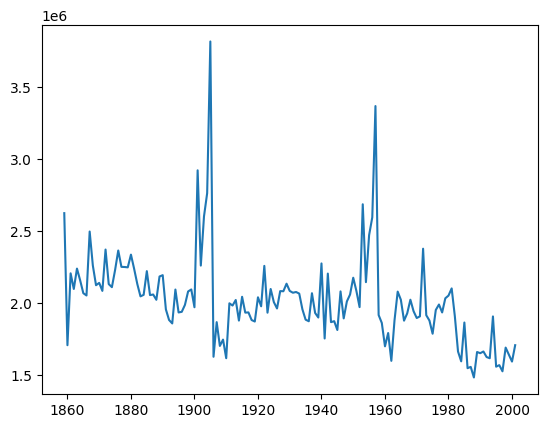

In [83]:
store_14['Weekly_Sales'].plot()

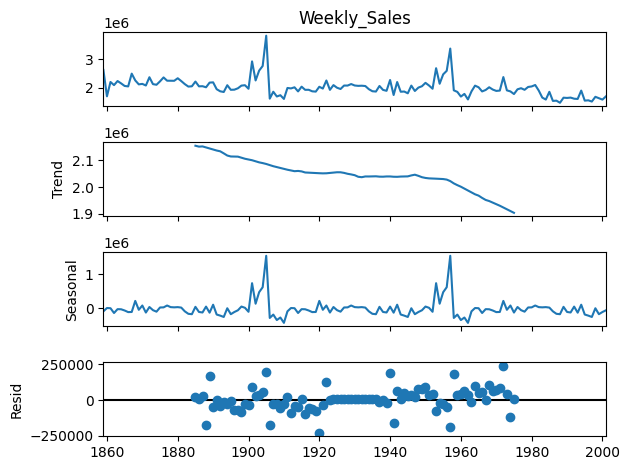

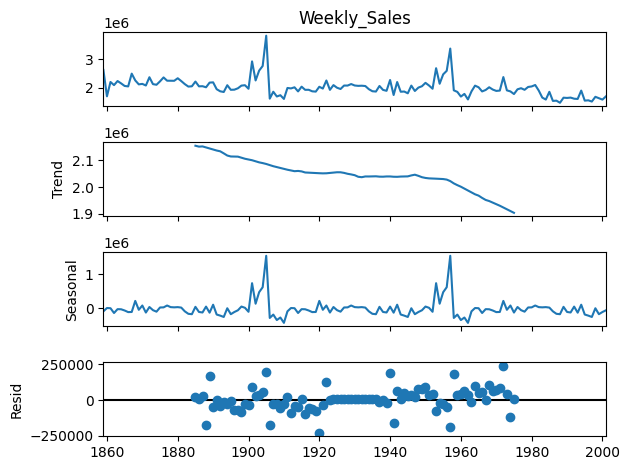

In [84]:
decomposition = seasonal_decompose(store_14["Weekly_Sales"],period=52)
decomposition.plot()

In [85]:
result = adfuller(store_14["Weekly_Sales"])
print(result)

(-2.7368866106752, 0.06786986708375098, 6, 136, {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}, 3564.7634948094546)


In [86]:
if (result[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

The data is not stationary


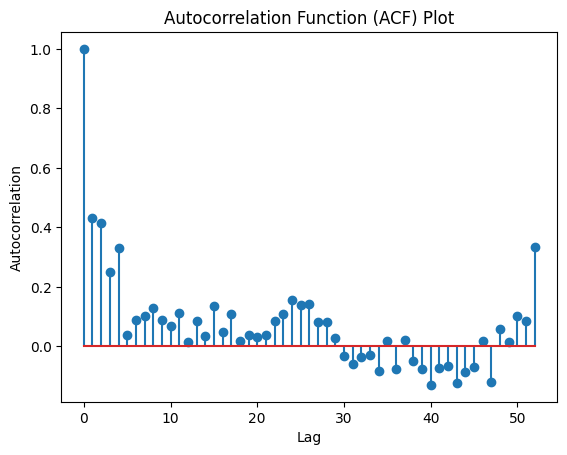

In [87]:
# Compute the ACF
acf_vals = acf(store_14['Weekly_Sales'], fft=True, nlags=52)

# Plot the ACF
plt.stem(acf_vals)
plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

<Axes: >

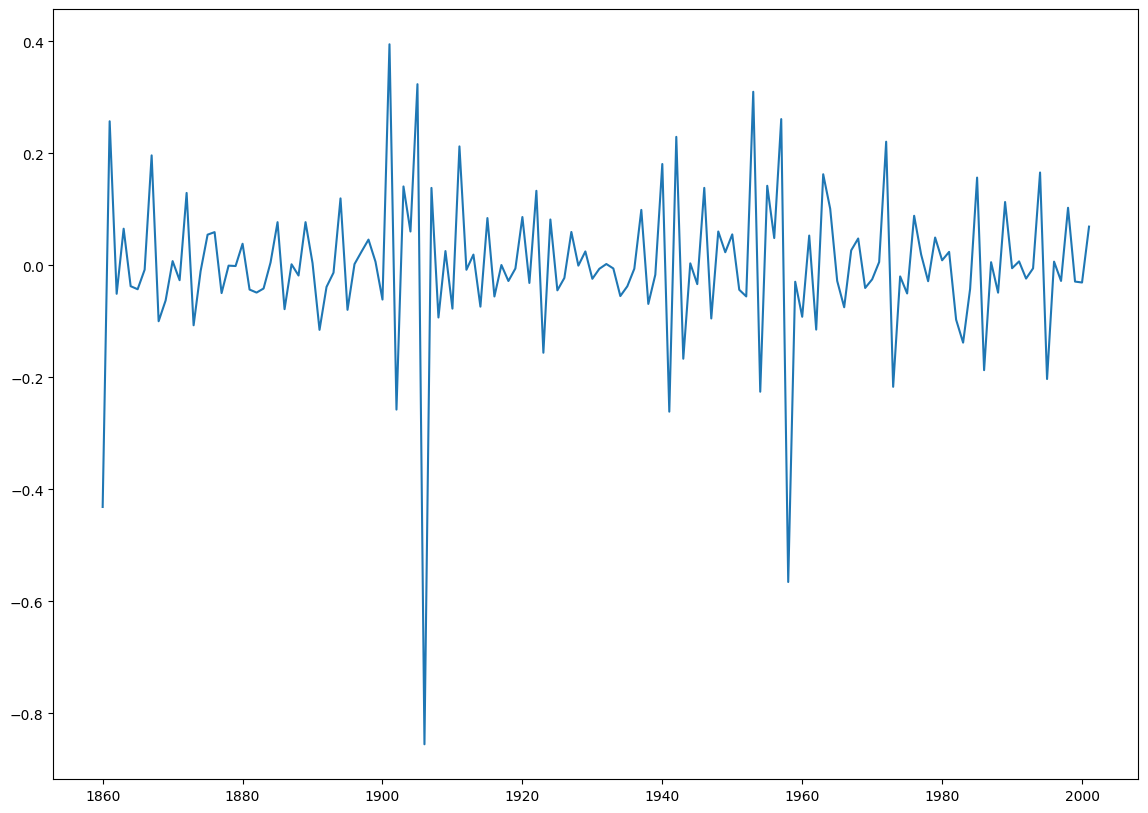

In [88]:
# Log transformation for making the data stationary.

store_14['sales_log'] = np.log(store_14['Weekly_Sales']).diff().dropna()
store_14['sales_log'].plot(figsize=(14,10))

In [94]:
store_14.head()
store_14.dropna(inplace=True)

In [95]:
result = adfuller(store_14["sales_log"])
print(result)

(-7.416277032038037, 6.922022287628127e-11, 5, 136, {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}, -188.3872212055212)


In [96]:
if (result[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

The data is stationary


In [97]:
store_14.head()

,Date,Weekly_Sales,sales_log
1860,2010-02-12,1704218.84,-0.431391
1861,2010-02-19,2204556.70,0.257420
1862,2010-02-26,2095591.63,-0.050691
1863,2010-03-05,2237544.75,0.065543
1864,2010-03-12,2156035.06,-0.037108


In [98]:
store_14.drop("Weekly_Sales",axis = 1, inplace=True)
store_14.rename(columns ={'Date':'ds','sales_log':'y'},inplace=True)
store_14.head()

,ds,y
1860,2010-02-12,-0.431391
1861,2010-02-19,0.257420
1862,2010-02-26,-0.050691
1863,2010-03-05,0.065543
1864,2010-03-12,-0.037108


In [99]:
# Model Building

store_14_model = Prophet(interval_width=0.99)

In [100]:
# Training the model

store_14_model.fit(store_14)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptn9f205_/g5b1_6tp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptn9f205_/o0ij3rl6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25729', 'data', 'file=/tmp/tmptn9f205_/g5b1_6tp.json', 'init=/tmp/tmptn9f205_/o0ij3rl6.json', 'output', 'file=/tmp/tmptn9f205_/prophet_modelcqrlkze0/prophet_model-20240229055711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:57:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:57:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [101]:
store_14_pred = store_14_model.make_future_dataframe(periods=12,freq='W')
store_14_pred.tail(12)

,ds
142,2012-10-28
143,2012-11-04
144,2012-11-11
145,2012-11-18
146,2012-11-25
147,2012-12-02
148,2012-12-09
149,2012-12-16
150,2012-12-23
151,2012-12-30


In [102]:
store_14_forecast = store_14_model.predict(store_14_pred)
store_14_forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(12)

,ds,yhat,yhat_lower,yhat_upper
142,2012-10-28,0.024307,-0.327720,0.373864
143,2012-11-04,0.040761,-0.273654,0.392900
144,2012-11-11,0.038854,-0.325737,0.418133
145,2012-11-18,0.027764,-0.330140,0.346016
146,2012-11-25,0.040139,-0.322473,0.345841
147,2012-12-02,0.083076,-0.253693,0.437735
148,2012-12-09,0.110246,-0.242971,0.460394
149,2012-12-16,0.062616,-0.276665,0.375879
150,2012-12-23,-0.058618,-0.398153,0.282773
151,2012-12-30,-0.173340,-0.496291,0.182525


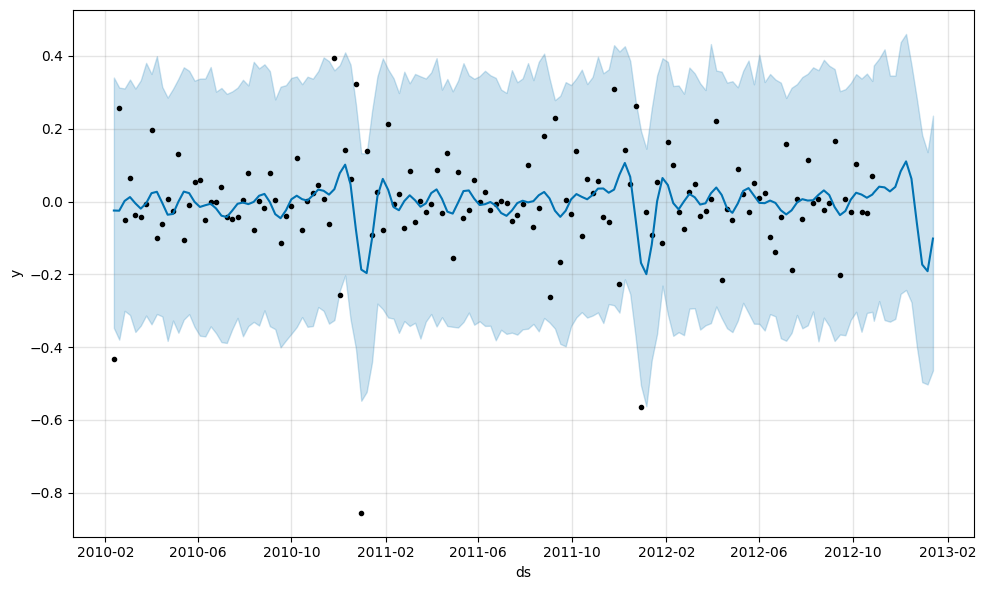

In [103]:
fig4 = store_14_model.plot(store_14_forecast)

## Predciting sales for store no 20

In [108]:
store_20 = data[data['Store']==20][['Date','Weekly_Sales']]
store_20.head()

,Date,Weekly_Sales
2717,2010-02-05,2401395.47
2718,2010-02-12,2109107.90
2719,2010-02-19,2161549.76
2720,2010-02-26,1898193.95
2721,2010-03-05,2119213.72


In [109]:
store_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 2717 to 2859
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          143 non-null    datetime64[ns]
 1   Weekly_Sales  143 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


<Axes: >

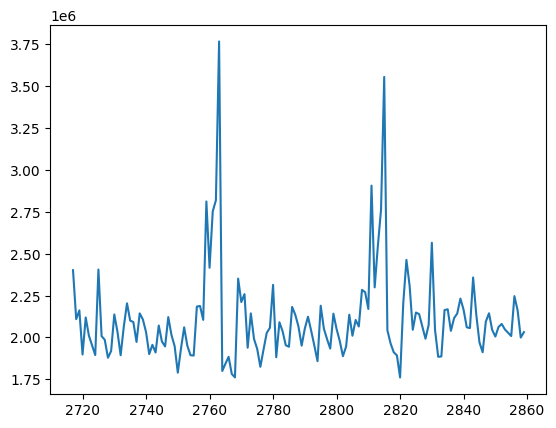

In [110]:
store_20['Weekly_Sales'].plot()

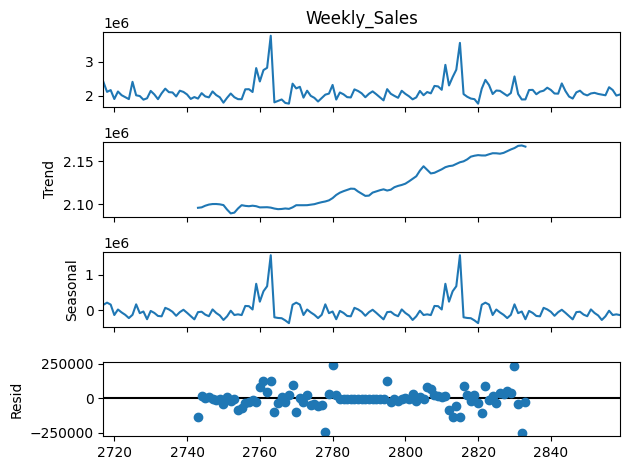

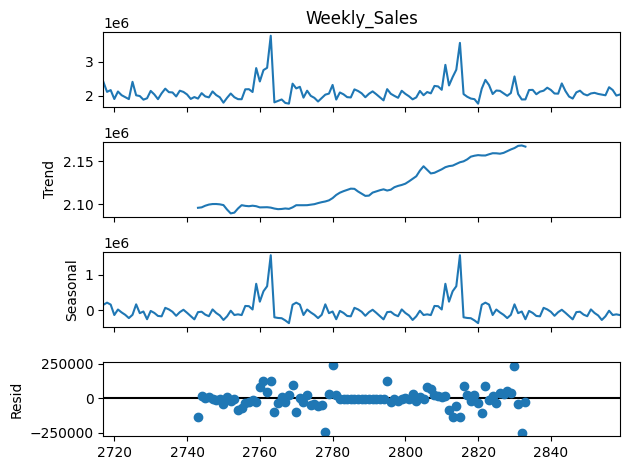

In [111]:
decomposition = seasonal_decompose(store_20["Weekly_Sales"],period=52)
decomposition.plot()

In [112]:
result = adfuller(store_20["Weekly_Sales"])
print(result)

if (result[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

(-5.39373869285483, 3.4912952838128377e-06, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 3553.6598733693677)
The data is stationary


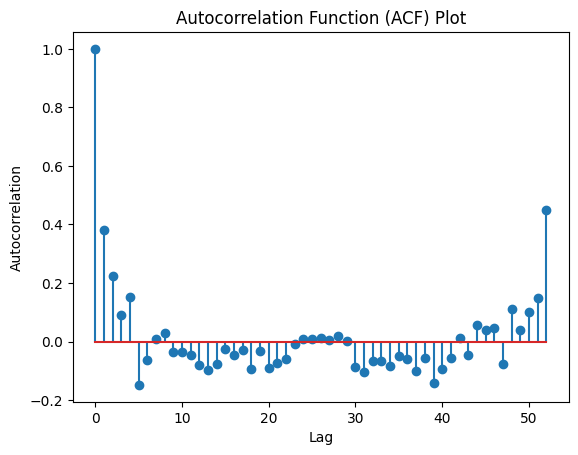

In [113]:
# Compute the ACF
acf_vals = acf(store_20['Weekly_Sales'], fft=True, nlags=52)

# Plot the ACF
plt.stem(acf_vals)
plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [114]:
store_20.rename(columns ={'Date':'ds','Weekly_Sales':'y'},inplace=True)
store_20.head()

,ds,y
2717,2010-02-05,2401395.47
2718,2010-02-12,2109107.90
2719,2010-02-19,2161549.76
2720,2010-02-26,1898193.95
2721,2010-03-05,2119213.72


In [121]:
# Model Building

store_20_model = Prophet(interval_width=0.95)

In [122]:
# Training the model

store_20_model.fit(store_20)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptn9f205_/t3k_7ph4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptn9f205_/34txfmra.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55152', 'data', 'file=/tmp/tmptn9f205_/t3k_7ph4.json', 'init=/tmp/tmptn9f205_/34txfmra.json', 'output', 'file=/tmp/tmptn9f205_/prophet_modeld39fnak7/prophet_model-20240229063616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:36:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:36:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [123]:
store_20_pred = store_20_model.make_future_dataframe(periods=12,freq='W')
store_20_pred.tail(12)

,ds
143,2012-10-28
144,2012-11-04
145,2012-11-11
146,2012-11-18
147,2012-11-25
148,2012-12-02
149,2012-12-09
150,2012-12-16
151,2012-12-23
152,2012-12-30


In [124]:
store_20_forecast = store_20_model.predict(store_20_pred)

In [125]:
store_20_forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(12)

,ds,yhat,yhat_lower,yhat_upper
143,2012-10-28,2.076860e+06,1.731870e+06,2.426622e+06
144,2012-11-04,2.207911e+06,1.867707e+06,2.559584e+06
145,2012-11-11,2.344628e+06,2.035721e+06,2.697292e+06
146,2012-11-18,2.414923e+06,2.100851e+06,2.754680e+06
147,2012-11-25,2.465025e+06,2.110305e+06,2.818167e+06
148,2012-12-02,2.608735e+06,2.261469e+06,2.954935e+06
149,2012-12-09,2.860360e+06,2.527190e+06,3.175146e+06
150,2012-12-16,3.051465e+06,2.711024e+06,3.393410e+06
151,2012-12-23,2.961220e+06,2.604315e+06,3.280399e+06
152,2012-12-30,2.548238e+06,2.208502e+06,2.883004e+06


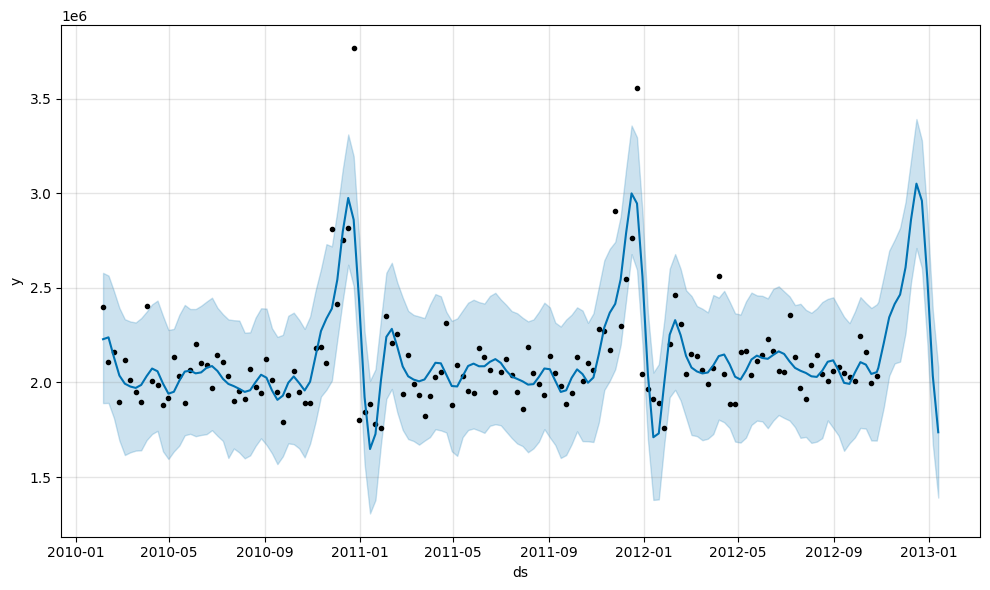

In [126]:
fig6 = store_20_model.plot(store_20_forecast)

In [127]:
actual_sales_3 = store_20['y'].iloc[114:]
predicted_sales_3 = store_20_forecast['yhat'].iloc[114:143]

In [128]:
mse = mean_squared_error(actual_sales_3,predicted_sales_3)
mae = mean_absolute_error(actual_sales_3,predicted_sales_3)
rmse = math.sqrt(mse)

print(f"Mean Squared error = {mse}")
print(f"Mean Absolute error = {mae}")
print(f"Root mean squared error = {rmse}")

Mean Squared error = 10484173266.446642
Mean Absolute error = 85196.24881839345
Root mean squared error = 102392.25198444774
